<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/MLWeek7_KlasifikasiHeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tahap 1: Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing dan evaluasi
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Model Machine Learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load dataset
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv'
df = pd.read_csv(url)

# Menampilkan 5 baris pertama
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# Tahap 2: Preprocessing Data

# Mengecek tipe data
df.info()

# Menghapus kolom non-numerik (jika ada) dan baris kosong
df = df.select_dtypes(include=[np.number])
df = df.dropna()

# Mengubah label 'num' menjadi biner (0 = tidak sakit, 1 = sakit)
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Memisahkan fitur (X) dan target (y)
X = df.drop(columns='num')
y = df['num']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [ ]:
# Tahap 3: Model Bagging - Random Forest

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi hasil
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Tahap 4: Model Boosting - XGBoost

# Membuat model XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi hasil
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:19:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Tahap 5: Evaluasi Model

# Fungsi evaluasi
def evaluate_model(y_true, y_pred, y_probs):
    return {
        'Akurasi': accuracy_score(y_true, y_pred),
        'Presisi': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_probs)
    }

# Evaluasi Random Forest
rf_eval = evaluate_model(y_test, rf_preds, rf_probs)

# Evaluasi XGBoost
xgb_eval = evaluate_model(y_test, xgb_preds, xgb_probs)

# Menampilkan perbandingan hasil evaluasi
pd.DataFrame([rf_eval, xgb_eval], index=['Random Forest (Bagging)', 'XGBoost (Boosting)'])

,Akurasi,Presisi,Recall,F1-Score,AUC
Random Forest (Bagging),0.883333,0.84,0.875,0.857143,0.947338
XGBoost (Boosting),0.833333,0.75,0.875,0.807692,0.894676


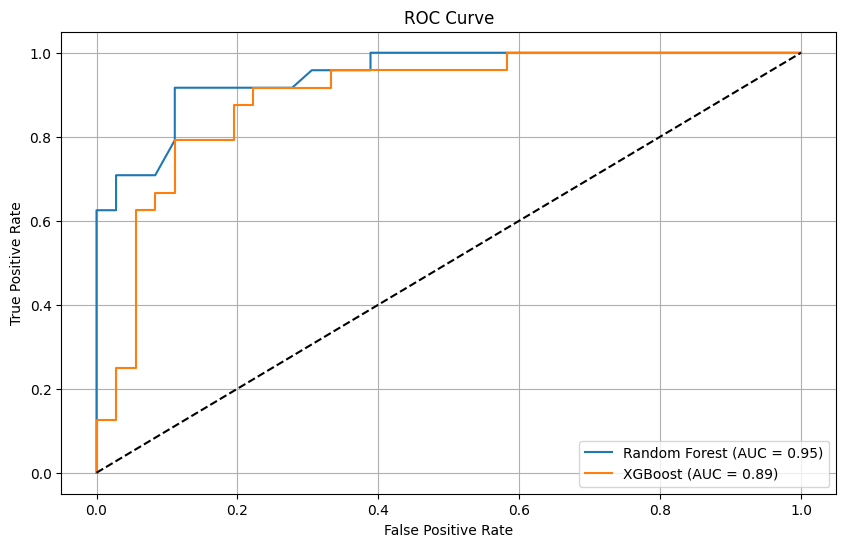

In [ ]:
# Tahap 6: Visualisasi ROC Curve

# Hitung nilai ROC untuk masing-masing model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

# Visualisasi kurva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_eval['AUC']))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(xgb_eval['AUC']))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Penjelasan Matriks Evaluasi

**Akurasi**  
Akurasi = (TP + TN) / (TP + TN + FP + FN)  
Mengukur seberapa sering model membuat prediksi yang benar secara keseluruhan.

**Presisi**  
Presisi = TP / (TP + FP)  
Menunjukkan ketepatan model dalam memprediksi kelas positif.

**Recall**  
Recall = TP / (TP + FN)  
Menunjukkan seberapa baik model menangkap semua nilai positif sebenarnya.

**F1-Score**  
F1 = 2 * (Presisi * Recall) / (Presisi + Recall)  
Merupakan rata-rata harmonis antara presisi dan recall.

**AUC (Area Under Curve)**  
AUC mengukur kemampuan model dalam membedakan antara kelas positif dan negatif.

**ROC (Receiver Operating Characteristic Curve)**  
ROC Curve adalah grafik antara True Positive Rate dan False Positive Rate. Semakin ke kiri atas, semakin baik modelnya.

### Perbandingan Model

Dari hasil evaluasi:

- Jika kita ingin model yang menangkap sebanyak mungkin kasus penyakit jantung (recall tinggi), maka model dengan nilai recall tertinggi lebih sesuai.
- Jika kita ingin keseimbangan antara presisi dan recall, maka F1-Score menjadi acuan utama.
- AUC adalah indikator keseluruhan performa model dalam klasifikasi biner.

Jika XGBoost memiliki nilai F1-Score dan AUC lebih tinggi dari Random Forest, maka dapat disimpulkan bahwa **XGBoost (Boosting)** adalah model yang lebih baik dalam kasus ini.

Namun, jika Random Forest memiliki performa yang mirip dan lebih cepat secara komputasi, maka itu bisa menjadi pilihan yang lebih efisien.